**Clustering_Global_development**

**Task 1: Exploratory Data Analysis**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel('/content/World_development_mesurement.xlsx')
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [2]:
# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [3]:
# Fill missing values only in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[numeric_cols]

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
0,0.020000,87931.000000,39.999418,94.875676,2.699800e+04,0.03500,302.068503,0.034000,0.000000,0.100000,71.000000,67.000000,0.000000,1,0.342000,0.619000,0.039000,31719449,0.599
1,0.050000,9542.000000,39.999418,94.875676,7.499000e+03,0.03400,302.068503,0.128000,0.000000,1.032000,47.000000,44.000000,0.000000,1,0.476000,0.499000,0.025000,13924930,0.324
2,0.043000,1617.000000,39.999418,94.875676,1.983000e+03,0.04300,302.068503,0.090000,0.000000,0.148103,57.000000,53.000000,0.000000,1,0.454000,0.517000,0.029000,6949366,0.383
3,0.027000,4276.000000,39.999418,94.875676,1.836000e+03,0.04700,302.068503,0.054000,0.000000,0.155000,52.000000,49.000000,0.100000,1,0.383000,0.587000,0.029000,1755375,0.532
4,0.046000,1041.000000,39.999418,94.875676,7.723684e+04,0.05100,302.068503,0.096000,0.000000,0.148103,52.000000,49.000000,0.000000,1,0.468000,0.505000,0.028000,11607944,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,142307.107765,39.999418,94.875676,7.723684e+04,0.06417,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1,0.303051,0.623481,0.073465,32427,0.911
2700,0.013000,142307.107765,5.000000,4.000000,2.132446e+06,0.17900,175.000000,0.006000,0.800000,0.033000,81.000000,76.000000,1.000000,1,0.196000,0.667000,0.136000,313873685,0.811
2701,0.015000,142307.107765,7.000000,85.000000,7.723684e+04,0.08900,310.000000,0.010000,0.500000,0.112000,80.000000,74.000000,1.500000,1,0.220000,0.639000,0.140000,3395253,0.948
2702,0.020000,142307.107765,144.000000,180.000000,7.723684e+04,0.04600,792.000000,0.013000,0.500000,0.164000,78.000000,72.000000,1.000000,1,0.288000,0.652000,0.060000,29954782,0.889


In [4]:
# Fill missing strings with a placeholder
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].fillna('Unknown')
df[string_cols]

,Business Tax Rate,Country,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,Unknown,Algeria,"$54,790,058,957",$60,"$102,000,000","$193,000,000"
1,Unknown,Angola,"$9,129,594,819",$22,"$34,000,000","$146,000,000"
2,Unknown,Benin,"$2,359,122,303",$15,"$77,000,000","$50,000,000"
3,Unknown,Botswana,"$5,788,311,645",$152,"$227,000,000","$209,000,000"
4,Unknown,Burkina Faso,"$2,610,959,139",$12,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...
2699,Unknown,Turks and Caicos Islands,Unknown,Unknown,Unknown,Unknown
2700,46.4%,United States,"$16,244,600,000,000","$8,895","$200,092,000,000","$126,573,000,000"
2701,41.9%,Uruguay,"$50,004,354,667","$1,308","$2,222,000,000","$1,028,000,000"
2702,61.9%,"Venezuela, RB","$381,286,223,859",$593,"$904,000,000","$3,202,000,000"


In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
X_scaled

array([[-2.44938515e-01, -9.96101719e-02,  0.00000000e+00, ...,
        -7.25972640e-01,  2.10962170e-03,  1.47332941e-01],
       [ 2.46167047e+00, -2.43208934e-01,  0.00000000e+00, ...,
        -1.02087306e+00, -1.41086916e-01, -9.76646386e-01],
       [ 1.83012837e+00, -2.57726535e-01,  0.00000000e+00, ...,
        -9.36615794e-01, -1.97220865e-01, -7.35501730e-01],
       ...,
       [-6.96040012e-01,  0.00000000e+00, -7.22485265e-01, ...,
         1.40152321e+00, -2.25821620e-01,  1.57376489e+00],
       [-2.44938515e-01,  0.00000000e+00,  2.27697617e+00, ...,
        -2.83622018e-01, -1.20910546e-02,  1.33262023e+00],
       [-1.05692121e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.65429500e+00, -2.52296820e-01,  1.57785208e+00]])

**Task 2: Model Building & Fitting**

**K-Means Clustering**

In [6]:
from sklearn.cluster import KMeans

# Build and fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
df['KMeans_Cluster'] = kmeans.labels_


**Hierarchical Clustering**

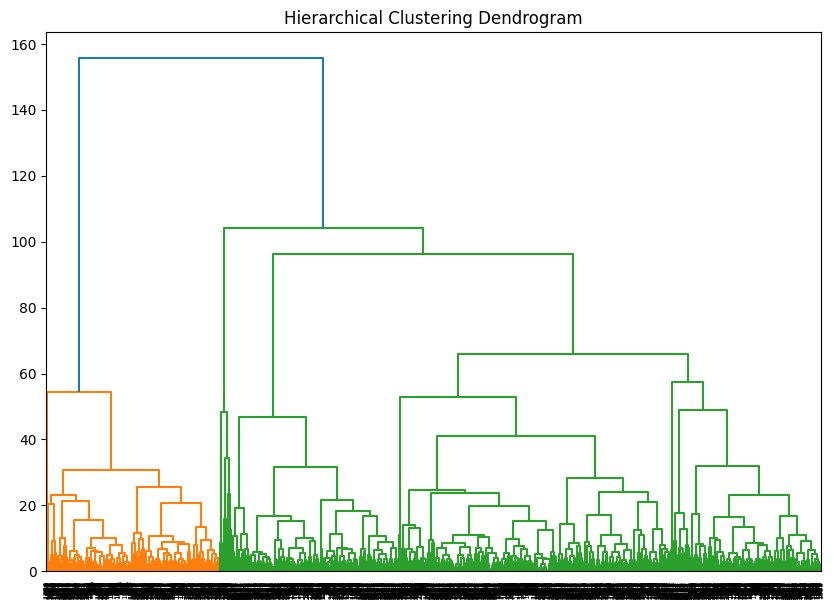

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Build linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


**DBSCAN**

In [8]:
from sklearn.cluster import DBSCAN

# Build and fit DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Assign cluster labels
df['DBSCAN_Cluster'] = dbscan.labels_


**Task 3: Model Evaluation**

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# KMeans Evaluation
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))

# DBSCAN Evaluation (excluding noise)
dbscan_labels = dbscan.labels_
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    filtered = dbscan_labels != -1
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled[filtered], dbscan_labels[filtered]))
else:
    print("DBSCAN clustering too sparse for silhouette score.")


KMeans Silhouette Score: 0.24923024166136262
KMeans Davies-Bouldin Index: 1.2814389233060377
KMeans Calinski-Harabasz Index: 883.6091696377334
DBSCAN Silhouette Score: -0.20585342118741565


**visualization**

/tmp/ipython-input-958501095.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


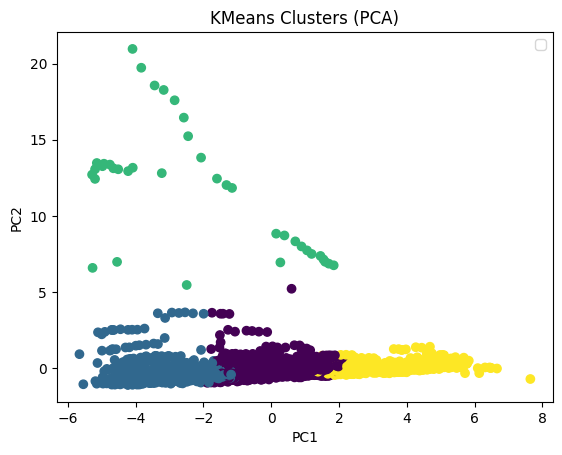

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot KMeans clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


/tmp/ipython-input-3684818792.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], c=col, marker='o', s=20, label=f'Cluster {k}' if k != -1 else 'Noise')


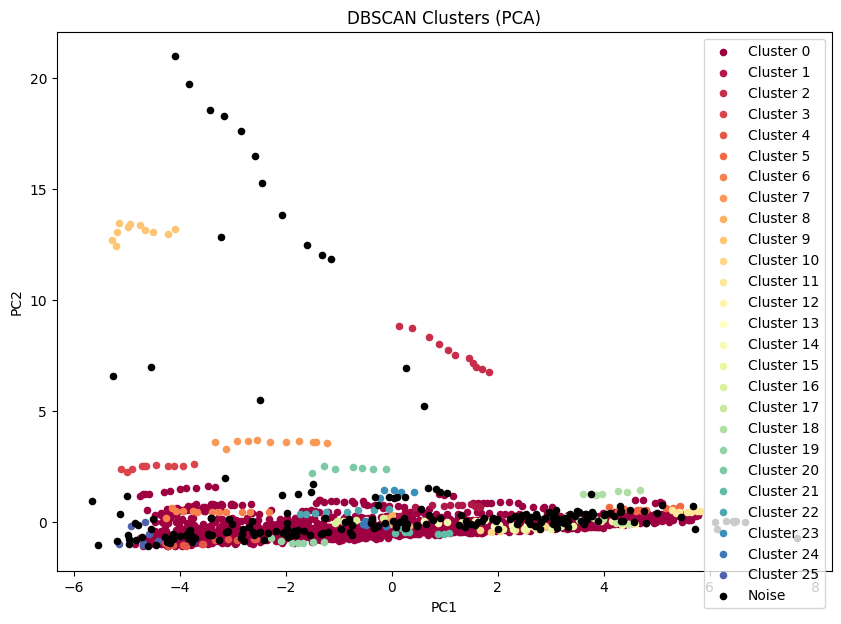

In [11]:
# Plot DBSCAN clusters
import numpy as np
plt.figure(figsize=(10, 7))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise points
        col = 'k'

    class_member_mask = (dbscan_labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, marker='o', s=20, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X_scaled)


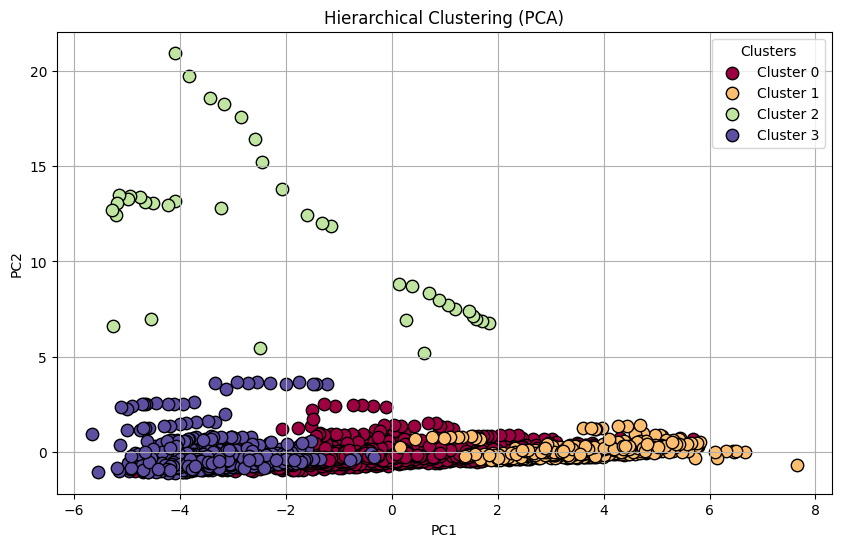

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
unique_labels = sorted(set(labels))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    cluster_mask = (labels == k)
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                c=[col], label=f"Cluster {k}", edgecolors='k', s=80)

plt.title("Hierarchical Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clusters", loc="best")
plt.grid(True)
plt.show()


In [14]:
# --- Compile results ---
comparison_df = pd.DataFrame({
    'Method': ['KMeans', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [round(kmeans_score, 3),
                         round(dbscan_score, 3) if dbscan_score else 'N/A',
                         round(hier_score, 3)]
})

# --- Display comparison ---
print(" Clustering Method Comparison")
display(comparison_df)

 Clustering Method Comparison


,Method,Silhouette Score
0,KMeans,0.249
1,DBSCAN,-0.206
2,Hierarchical,0.218


**The link below is the App link**

https://clusteringglobaldevelopment-h2lfyoxbptcjad6m5ciwt6.streamlit.app/